<a href="https://colab.research.google.com/github/TobiasLaimer/ColabStuff/blob/master/ps1_ex3_prelim_almost_subm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [0]:
#3.1 "Take the function f (x) = 7.2 − 3.1x + 4.3x**3 . For 100 equally spaced bins in the interval (−5, 8) add a Gaussian noise (independent in each bin) with respective 
#means 0 and standard deviation σ = 150 to the data points."

#values from instruction
x_min= -5
x_max= 8
mean= 0
std= 150
N= 100

x= np.linspace(x_min, x_max, N) #N equally spaced bins
noise = np.random.normal(mean, std, N)
z=  7.2- 3.1*x+ 4.3*x**3
y= z+ noise

#sanity check: 
#print (noise.mean(), noise.std(), np.corrcoef(z, noise), " should be reasonably close to [0, 150, 1,0,0,1]") #it is :)
#plt.plot(x,y), plt.plot(x,z) #should approximate the curve reasonably well -it does:)

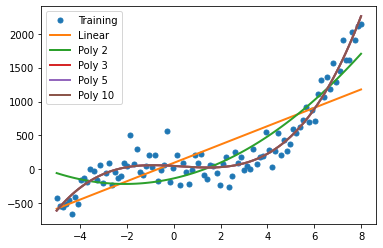

In [22]:
#3.2 "Now fit polynomials of degree 1, 2, 3, 5, 10 to the entire dataset, using linear regression with ordinary least squares."

#Linear Regression
# Create linear regression object
clf = linear_model.LinearRegression()

# Train the model using the training sets
clf.fit(x[:, np.newaxis], y)

xplot= np.linspace(x_min, x_max, N)

#training data
p1= plt.plot(x,y, "o",ms=5, label='Training')

#fit polynomial of degree 1
linear_plot= plt.plot(xplot, clf.predict(xplot[:, np.newaxis]),label='Linear',linewidth=2)

#fit polynomial of degree 2
poly2 = PolynomialFeatures(degree=2)
X = poly2.fit_transform(x[:,np.newaxis])
clf2 = linear_model.LinearRegression()
clf2.fit(X,y)

Xplot=poly2.fit_transform(xplot[:,np.newaxis])
poly2_plot=plt.plot(xplot, clf2.predict(Xplot), label='Poly 2',linewidth=2)

#fit polynomial of degree 3
poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = linear_model.LinearRegression()
clf3.fit(X,y)

Xplot=poly3.fit_transform(xplot[:,np.newaxis])
poly3_plot=plt.plot(xplot, clf3.predict(Xplot), label='Poly 3',linewidth=2)

#fit polynomial of degree 5
poly5 = PolynomialFeatures(degree=3)
X = poly5.fit_transform(x[:,np.newaxis])
clf5 = linear_model.LinearRegression()
clf5.fit(X,y)

Xplot=poly5.fit_transform(xplot[:,np.newaxis])
poly5_plot=plt.plot(xplot, clf5.predict(Xplot), label='Poly 5',linewidth=2)

#fit polynomial of degree 10
poly10 = PolynomialFeatures(degree=3)
X = poly10.fit_transform(x[:,np.newaxis])
clf10 = linear_model.LinearRegression()
clf10.fit(X,y)

Xplot=poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot=plt.plot(xplot, clf10.predict(Xplot), label='Poly 10',linewidth=2)


#show legend (even if it should be obvious which polynomial is which. 3,5 and 10 are indistinguishable anyway)
plt.legend()

-5 8 0 150 100  are [x_min, x_max, mean, std, N]


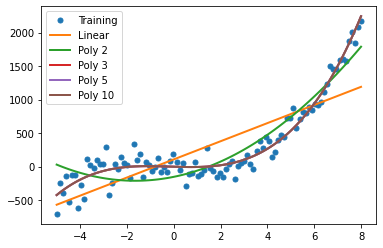

In [54]:
#3.3 " Repeat the same fitting but with reduced data sets. Visualise your findings and describe the differences? How do they depend on the interval you pick the data from?"

#first copy everything from above (yeah it's not really elegant...sorry)

x_min= -5
x_max= 8
mean= 0
std= 150
N= 100

x= np.linspace(x_min, x_max, N)
noise = np.random.normal(mean, std, N)
z=  7.2- 3.1*x+ 4.3*x**3
y= z+ noise

clf = linear_model.LinearRegression()

# Train the model using the training sets
clf.fit(x[:, np.newaxis], y)

xplot= np.linspace(x_min, x_max, N)

#training data
p1= plt.plot(x,y, "o",ms=5, label='Training')

#fit polynomial of degree 1
linear_plot= plt.plot(xplot, clf.predict(xplot[:, np.newaxis]),label='Linear',linewidth=2)

#fit polynomial of degree 2
poly2 = PolynomialFeatures(degree=2)
X = poly2.fit_transform(x[:,np.newaxis])
clf2 = linear_model.LinearRegression()
clf2.fit(X,y)

Xplot=poly2.fit_transform(xplot[:,np.newaxis])
poly2_plot=plt.plot(xplot, clf2.predict(Xplot), label='Poly 2',linewidth=2)

#fit polynomial of degree 3
poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = linear_model.LinearRegression()
clf3.fit(X,y)

Xplot=poly3.fit_transform(xplot[:,np.newaxis])
poly3_plot=plt.plot(xplot, clf3.predict(Xplot), label='Poly 3',linewidth=2)

#fit polynomial of degree 5
poly5 = PolynomialFeatures(degree=3)
X = poly5.fit_transform(x[:,np.newaxis])
clf5 = linear_model.LinearRegression()
clf5.fit(X,y)

Xplot=poly5.fit_transform(xplot[:,np.newaxis])
poly5_plot=plt.plot(xplot, clf5.predict(Xplot), label='Poly 5',linewidth=2)

#fit polynomial of degree 10
poly10 = PolynomialFeatures(degree=3)
X = poly10.fit_transform(x[:,np.newaxis])
clf10 = linear_model.LinearRegression()
clf10.fit(X,y)

Xplot=poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot=plt.plot(xplot, clf10.predict(Xplot), label='Poly 10',linewidth=2) 


#so now we can play around with our data set. Possibly interesting changes are: 

#divide into train/test set (poly10 should diverge if the test set has higher x-values than the training set)
#change x-range -> observation: stable, even with <0.1 data point per x-range poly3,5,10 stay equivalent
#change std of noise -> big std: more random behavior (makes sense), small std: all data points fit poly3,5,10 perfectly
#change sample size -> observation: nothing about the curves changes (except obviously for <10 data points)



plt.legend()
print(x_min, x_max, mean, std, N, " are [x_min, x_max, mean, std, N]")
#plt.title('x_min=-50, x_max= 80, mean= 0, std= 150, N= 1000')